In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pickle

In [3]:
data = pd.read_csv("insurance.csv")


In [4]:
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [5]:
print(data.shape)

(1338, 7)


In [6]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [7]:
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


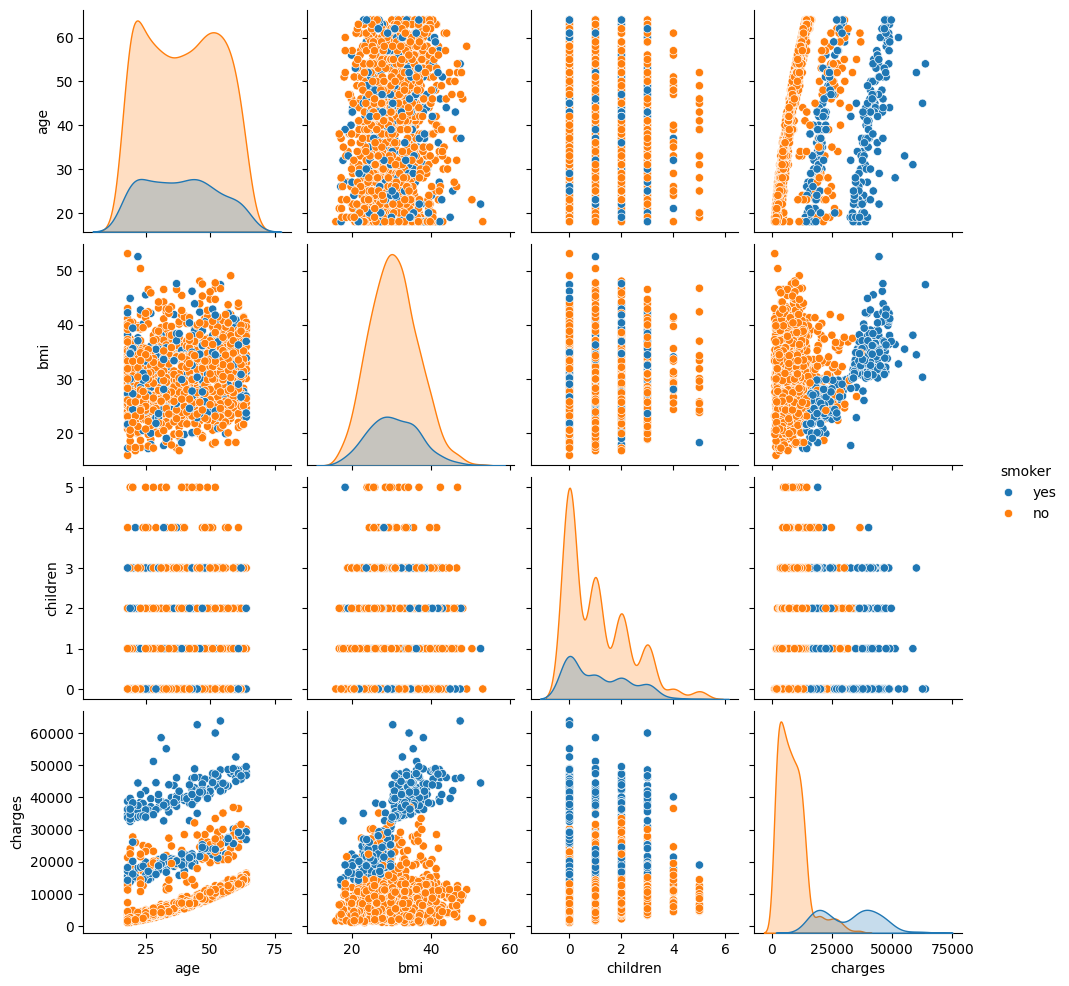

In [8]:
sns.pairplot(data, hue="smoker")
plt.show()

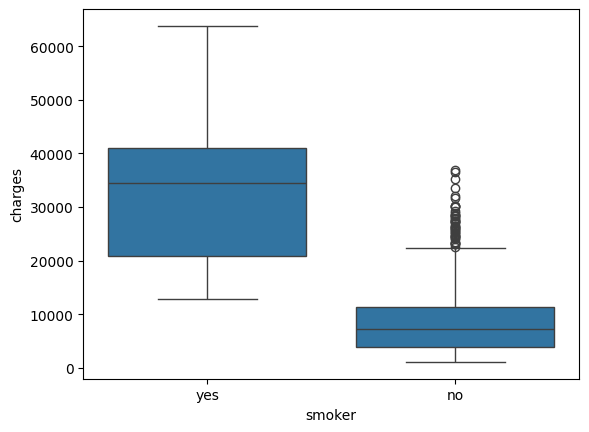

In [9]:
sns.boxplot(x="smoker", y="charges", data=data)
plt.show()

In [13]:
data['bmi'] = data['bmi'].clip(
    lower=data['bmi'].quantile(0.05),
    upper=data['bmi'].quantile(0.95)
)

In [11]:
encoder = LabelEncoder()

for col in ['sex', 'smoker', 'region']:
    data[col] = encoder.fit_transform(data[col])

In [14]:
X = data.drop('charges', axis=1)
y = data['charges']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=10
)

In [16]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [17]:
train_pred = mlr.predict(X_train)
test_pred = mlr.predict(X_test)


In [18]:
print("Train R²:", r2_score(y_train, train_pred))

Train R²: 0.761102870602438


In [19]:
print("Test  R²:", r2_score(y_test, test_pred))

Test  R²: 0.7188463411555144


In [20]:
print("RMSE   :", np.sqrt(mean_squared_error(y_test, test_pred)))

RMSE   : 6148.584470241224


In [21]:
coeff = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': mlr.coef_
})

In [22]:
coeff

,Feature,Coefficient
0,age,260.193223
1,sex,-254.334382
2,bmi,380.537775
3,children,563.087292
4,smoker,24245.141557
5,region,-247.315219


In [23]:
new_customer = pd.DataFrame({
    'age':[30],
    'sex':[1],
    'bmi':[26.5],
    'children':[1],
    'smoker':[0],
    'region':[2]
})

In [24]:
prediction = mlr.predict(new_customer)
print("Predicted Insurance Cost:", prediction[0])


Predicted Insurance Cost: 4109.791812003819
